<a href="https://colab.research.google.com/github/3zero69/-/blob/main/%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%9A%8C%EA%B7%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [1]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ESAA/abalone (3).csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [5]:
# 필요한 모듈 불러오기

# train_test_split 함수 불러오기
from sklearn.model_selection import train_test_split

In [11]:
# train과 test set 분리 (train:test = 7:3 비율로)

# 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)

# 나누어진 데이터셋 확인
print('학습셋의 shape: ', X_train.shape)
print('검증셋의 shape: ', X_test.shape)
print('학습셋 label의 shape: ', y_train.shape)
print('검증셋 label의 shape: ', y_test.shape)


학습셋의 shape:  (2923, 10)
검증셋의 shape:  (1254, 10)
학습셋 label의 shape:  (2923,)
검증셋 label의 shape:  (1254,)


## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [33]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [34]:
#릿지모델 생성 및 훈련
# alpha=0.3으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 0.3)
ridge.fit(X_train, y_train)

#예측값 구하기
# 모델 예측치 구하기
y_preds=ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
# 모델 예측치를 활용해 최종적으로 전복의 나이를 예측 - 예측된 ‘껍질의 고리 수’에 1.5를 더하면 전복의 나이
print(y_preds + 1.5)

#MSE와 RMSE구하기
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_preds)
print('MSE:', MSE)
print('RMSE:',np.sqrt(MSE))

[1.63709963 3.58228151 2.42230547 2.03045181 2.4471506  1.46380333
 1.39805752 3.64917241 2.22989713 2.62512594 2.9274204  3.50575208
 1.32633444 1.98414843 3.38680028 2.40466869 1.5941703  1.04398822
 3.00218876 1.36373885 2.02407762 1.92455465 2.11520821 2.19359154
 2.70896128 2.58423082 2.31618513 2.70799751 2.25358651 3.47954113
 1.44355472 1.77176079 2.68836981 1.74750253 1.56597053 1.82458393
 3.19132414 2.70862778 2.64574109 3.46727827 1.66497529 1.74048132
 2.39957986 2.4968327  2.76792471 1.64198144 3.2560912  2.48113065
 3.16198169 1.62866835 3.15335704 3.27208347 1.75333993 3.74935028]
MSE: 0.08950433539850346
RMSE: 0.29917275176476793


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요. 

In [15]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [35]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas :
  ridge = Ridge(alpha = alpha)

  # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
  from sklearn.model_selection import cross_val_score
  import numpy as np 
  neg_mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv = 5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha, avg_rmse))
  

alpha 0 일 때 5 folds 의 평균 RMSE : 2.242 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 2.237 
alpha 1 일 때 5 folds 의 평균 RMSE : 2.230 
alpha 10 일 때 5 folds 의 평균 RMSE : 2.337 
alpha 100 일 때 5 folds 의 평균 RMSE : 2.621 


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [18]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [36]:
#모델 생성 및 훈련
xgb_reg = XGBRegressor(n_estimators=1000)
xgb_reg.fit(X_train, y_train)

#예측값 구하기
y_preds=xgb_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
print(y_preds + 1.5)

#MSE와 RMSE 구하기
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_preds)
print('MSE:', MSE)
print('RMSE:',np.sqrt(MSE))

[10:05:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1.4980707 3.5028439 2.414876  1.5115082 2.287313  2.371027  1.5006044
 3.5034213 2.506205  2.4831285 3.4318535 3.499693  1.4990485 2.3974752
 3.4995208 2.5112672 1.5168436 1.4981345 3.4893625 1.4989163 2.0777442
 1.5210905 1.9928077 2.5085573 2.50458   2.5223062 2.2746656 2.5066504
 2.5126204 3.5002093 1.4976566 1.5005984 2.4418635 1.4675708 1.498527
 1.4968195 3.5013018 2.4953473 2.5510252 3.4964347 1.5218377 1.5069863
 2.5134573 2.4928193 2.5033703 1.4982023 3.501605  1.9651465 3.49383
 1.5059088 3.4990225 3.4894447 1.4988625 3.4786894]
MSE: 0.03392137396933231
RMSE: 0.18417756098214655


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

[10:06:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


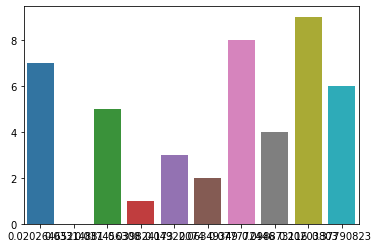

In [37]:
import seaborn as sns
%matplotlib inline

rf_reg = XGBRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습하자.
rf_reg.fit(X, y)

feature_series = pd.Series(data=rf_reg.feature_importances_)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)


---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요. 

In [23]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [24]:
wine = load_wine()

wine_x = wine.data # x변수 
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [25]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape 
y_train.shape 

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [27]:
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler()로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(wine.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, wine.target,
                                                    test_size=0.3, random_state=0)

from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용해 학습 및 예측 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

LogisticRegression()

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [39]:
#기울기
lr_clf.intercept_

array([ 0.40158772,  0.66378473, -1.06537245])

In [40]:
#절편
np.round(lr_clf.coef_,1)

array([[ 0.7,  0.2,  0.4, -0.7, -0. ,  0.2,  0.7, -0.2,  0.1,  0.2,  0.1,
         0.7,  1. ],
       [-0.8, -0.5, -0.7,  0.5, -0.1, -0. ,  0.2,  0.2,  0.3, -1. ,  0.6,
         0.1, -1. ],
       [ 0.1,  0.2,  0.3,  0.2,  0.1, -0.2, -0.9,  0. , -0.4,  0.8, -0.7,
        -0.8,  0. ]])

3-3) 모델의 정확도를 구하세요.

In [30]:
#모델의 예측값 구하기
lr_preds = lr_clf.predict(X_test)
print(lr_preds)

#모델의 정확도 구하기
# 정확도 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))


[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1 0 2 1 2 0 2 2 0 2]
accuracy: 1.000
